In [1]:
import pandas as pd
import numpy as np
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
import matplotlib.pyplot as plt
import seaborn as sns
import calendar as cal

In [2]:
df = pd.read_csv(r'C:\Users\1000204905\Desktop\GitHub\gun_violence.csv')

In [3]:
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,01/01/2013,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,01/01/2013,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,01/01/2013,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,05/01/2013,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,07/01/2013,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [4]:
states=df.groupby('state').sum()
order=states.sort_values(by='n_killed',ascending=False)
order

,incident_id,n_killed,n_injured,incident_url_fields_missing,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district
state,,,,,,,,,,
California,9314905580,5562,7644,False,356459.0,577560.4412,-1.917836e+06,16969.0,532962.0,267744.0
Texas,7221513824,5046,6106,False,256016.0,401450.6143,-1.266102e+06,9785.0,924048.0,211138.0
Florida,8604272742,3909,7072,False,176531.0,412720.7553,-1.194203e+06,13207.0,762426.0,262499.0
Illinois,10313141686,3409,13514,False,120844.0,699402.0119,-1.485748e+06,13524.0,662004.0,334747.0
Ohio,5706126775,2508,5703,False,76450.0,398228.7880,-8.153237e+05,9065.0,363305.0,150950.0
Georgia,4645742098,2456,4056,False,53591.0,288422.6982,-7.298494e+05,5887.0,936325.0,222174.0
Pennsylvania,4934851146,2395,5056,False,69745.0,345690.4937,-6.585184e+05,7007.0,120627.0,24871.0
North Carolina,4720659575,2225,4629,False,55320.0,300288.0009,-6.721887e+05,5734.0,469402.0,195507.0
Louisiana,4460652028,2179,4398,False,21892.0,236494.5036,-7.057692e+05,5443.0,506222.0,114673.0


In [5]:
new_data=order[[ "n_killed"]]
States=new_data.index
new_data_top=new_data.head(10)
new_data_bottom=new_data.tail(10)
new_data_bottom=new_data_bottom.sort_values(by='n_killed',ascending=True)


In [6]:
#bar_states=new_data_top.plot.bar(rot=40,color='green')
#plt.xlabel('States')
#plt.ylabel('Number of killed')
#plt.title('Number of killed by state')
#plt.legend(['Killed'])


In [7]:
#bar_states=new_data_bottom.plot.bar(rot=40,color='purple')
#plt.xlabel('States')
#plt.ylabel('Number of killed')
#plt.title('Number of killed by state')
#plt.legend(['Killed'])

In [8]:
df2 = pd.read_csv(r'C:\Users\1000204905\Desktop\GitHub\gun_violence.csv',parse_dates=['date'], index_col=['date'])

In [9]:
type(df2.index)

#Create new columns with day, month and year
df2['day'] = df2.index.day
df2['month'] = df2.index.month
df2['year'] = df2.index.year

df2

,incident_id,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,congressional_district,...,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,day,month,year
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,461105,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,14.0,...,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,1,1,2013
2013-01-01,460726,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,43.0,...,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0,1,1,2013
2013-01-01,478855,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,9.0,...,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0,1,1,2013
2013-05-01,478925,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,6.0,...,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0,1,5,2013
2013-07-01,478959,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,6.0,...,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0,1,7,2013
2013-07-01,478948,Oklahoma,Tulsa,6000 block of South Owasso,4,0,http://www.gunviolencearchive.org/incident/478948,http://usnews.nbcnews.com/_news/2013/01/07/163...,False,1.0,...,0::Rebeika Powell||1::Kayetie Melchor||2::Mist...,NaN,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.kjrh.com/news/local-news/4-found-sh...,72.0,11.0,1,7,2013
2013-01-19,479363,New Mexico,Albuquerque,2806 Long Lane,5,0,http://www.gunviolencearchive.org/incident/479363,http://hinterlandgazette.com/2013/01/pastor-gr...,False,1.0,...,0::Greg Griego||1::Sara Griego||2::Zephania Gr...,5::Family,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/nehemiah-gringo-ca...,10.0,14.0,19,1,2013
2013-01-21,479374,Louisiana,New Orleans,LaSalle Street and Martin Luther King Jr. Boul...,0,5,http://www.gunviolencearchive.org/incident/479374,http://www.nola.com/crime/index.ssf/2013/01/no...,False,2.0,...,NaN,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.huffingtonpost.com/2013/01/21/new-o...,93.0,5.0,21,1,2013
2013-01-21,479389,California,Brentwood,1100 block of Breton Drive,0,4,http://www.gunviolencearchive.org/incident/479389,http://sanfrancisco.cbslocal.com/2013/01/22/4-...,False,9.0,...,NaN,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.contracostatimes.com/ci_22426767/br...,11.0,7.0,21,1,2013


In [10]:
grouped=df2.groupby([df2.month]).agg('count')
#sns.lineplot(data=grouped, x='month',y='incident_id')

#Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#line plot
#ax = sns.relplot(x=grouped.index, y=grouped.incident_id, kind='line',data=grouped,palette='Blues_d',height=8,aspect=2)


#bar plot
#ax=sns.barplot(x=grouped.index, y=grouped.incident_id,data=grouped,palette='Blues_d')
#plt.xlabel('Months')
#plt.ylabel('# of incidents')
#plt.title('Incidents by month')
#ax.set_ylim([0,30000])
#ax.set_xlim([0,12])

#histgram
#hist=sns.distplot(df2.month,kde=False, color='purple', bins=12)



#plt.yticks(np.arange(0, 30000, step=5000))
#ax.set_yticks('5k','10k','15k','20k','25k','30k')


#label=['5k','10k','15k','20k','25k','30k']
#sns.set(style='whitegrid')
#
#sns.barplot(x=grouped.index, y=grouped.incident_id, data=grouped, order=Months, palette='Set3')
#plt.xticks(rotation=-75)
#plt.show(); 

#df['birthdate'].groupby([df.birthdate.dt.year, df.birthdate.dt.month]).agg('count')
#df['birthdate'].groupby(df.birthdate.dt.year).agg('count')


In [11]:
type(grouped.incident_id)

pandas.core.series.Series

In [12]:
#Remove the years 2013 and 2018

new_data=df2[(df2.year>=2014) & (df2.year<=2017)]

#Examples
#surveys_df[surveys_df.year == 2002]
#surveys_df[(surveys_df.year >= 1980) & (surveys_df.year <= 1985)]


#Count the crimes 
incident_count=new_data.groupby('state').agg('count')

#Sort by deaths
incident_count

killed_number=new_data.groupby('state').sum()
killed_sort=killed_number.sort_values(by='n_killed',ascending=False)

#Top 10 contries by killed number
top=killed_sort.head(10)
bottom=killed_sort.tail(10)



[Text(0,0,'California'),
 Text(0,0,'Texas'),
 Text(0,0,'Florida'),
 Text(0,0,'Illinois'),
 Text(0,0,'Ohio'),
 Text(0,0,'Georgia'),
 Text(0,0,'Pennsylvania'),
 Text(0,0,'North Carolina'),
 Text(0,0,'Louisiana'),
 Text(0,0,'Missouri')]

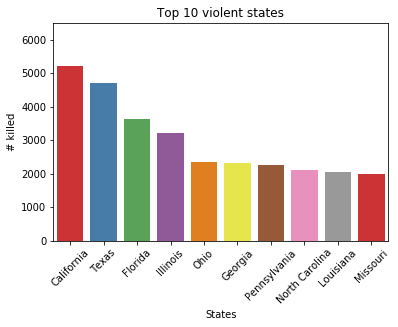

In [13]:
#Graph for years from 2014 to 2017
#bar plot top
killed_years=sns.barplot(x=top.index, y=top.n_killed,data=top,palette='Set1')
plt.xlabel('States')
plt.ylabel('# killed')
plt.title('Top 10 violent states')
killed_years.set_ylim([0,6500])
killed_years.set_xticklabels(killed_years.get_xticklabels(),rotation=45)



#Example to rotate labels
#chart.set_xticklabels(rotation=45)
#chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [14]:
#Creating table with States, n_killed and n_injured
table_nkilled=top[['n_killed','n_injured']]
table_nkilled

#Merge with the number of incidents

,n_killed,n_injured
state,,
California,5212,7073
Texas,4712,5691
Florida,3620,6657
Illinois,3230,12864
Ohio,2359,5396
Georgia,2323,3827
Pennsylvania,2246,4760
North Carolina,2112,4338
Louisiana,2042,4106


[Text(0,0,'Idaho'),
 Text(0,0,'Montana'),
 Text(0,0,'Maine'),
 Text(0,0,'New Hampshire'),
 Text(0,0,'South Dakota'),
 Text(0,0,'North Dakota'),
 Text(0,0,'Wyoming'),
 Text(0,0,'Hawaii'),
 Text(0,0,'Rhode Island'),
 Text(0,0,'Vermont')]

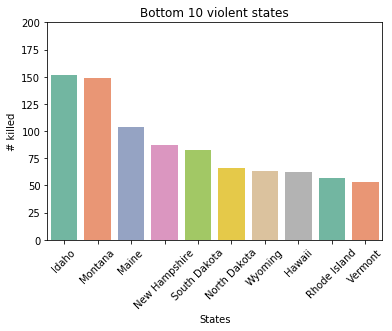

In [15]:
#bar plot bottom
killed_years_bottom=sns.barplot(x=bottom.index, y=bottom.n_killed,data=bottom,palette='Set2')
plt.xlabel('States')
plt.ylabel('# killed')
plt.title('Bottom 10 violent states')
killed_years_bottom.set_ylim([0,200])
killed_years_bottom.set_xticklabels(killed_years_bottom.get_xticklabels(),rotation=45)

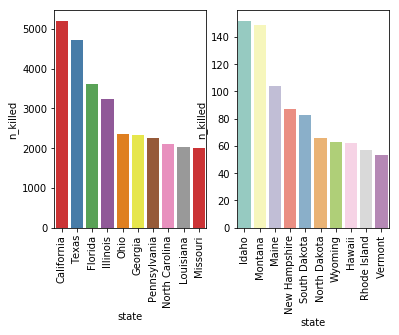

In [16]:
#PLot both 

fig, axs = plt.subplots(ncols=2)
sns.barplot(x=top.index, y=top.n_killed, data=top,palette='Set1', ax=axs[0])
sns.barplot(x=bottom.index, y=bottom.n_killed, data=bottom,palette='Set3',ax=axs[1])

for axs in fig.axes:
    plt.sca(axs)
    plt.xticks(rotation=90)

In [17]:
df3 = pd.read_csv(r'C:\Users\1000204905\Desktop\GitHub\Federal_Firearms.csv')

In [18]:
df3.set_index('State')
license=df3.rename(columns={"State": "state"})

In [19]:
left_merge=pd.merge(killed_number,license, on='state',how='left')
left_merge

,state,incident_id,n_killed,n_injured,incident_url_fields_missing,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district,day,month,year,FFL_Population
0,Alabama,2688746895,1742,2770,False,22438.0,166765.3632,-4.389747e+05,3327.0,292265.0,96599.0,81132,32986,10323743,2394
1,Alaska,716395784,256,306,False,1157.0,76745.7182,-1.849887e+05,1124.0,22033.0,129.0,20402,8132,2596253,975
2,Arizona,1139069655,1001,1007,False,11649.0,71041.5379,-2.385647e+05,1646.0,39157.0,39157.0,34991,14387,4387827,3189
3,Arkansas,1465014602,730,1264,False,5606.0,90119.0438,-2.372497e+05,1888.0,110525.0,59269.0,41557,17689,5341538,2042
4,California,8142373208,5212,7073,False,337221.0,539987.0322,-1.793631e+06,15302.0,503677.0,252966.0,238619,100039,30578626,8564
5,Colorado,1617799232,731,1045,False,10523.0,112512.6877,-3.014116e+05,2678.0,83936.0,47356.0,47660,19714,5976349,2893
6,Connecticut,1566518398,322,1188,False,8135.0,117474.6924,-2.068264e+05,2447.0,228820.0,44130.0,46377,19353,5851325,1843
7,Delaware,759469705,206,815,False,1434.0,61146.0347,-1.168986e+05,1037.0,21915.0,12326.0,25086,10113,3176253,350
8,District of Columbia,1670119250,422,1322,False,2678.0,115152.5982,-2.279654e+05,1959.0,84.0,225.0,48368,20115,6077168,25
9,Florida,7738281852,3620,6657,False,168082.0,391355.6633,-1.132251e+06,12089.0,726332.0,250279.0,223849,91079,28616330,7634


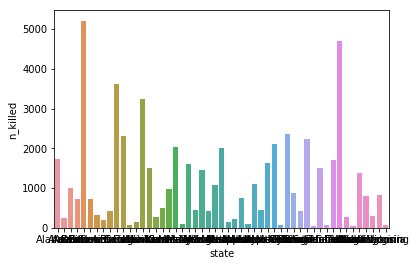

In [20]:
#fig, arms = plt.subplots()

#sns.barplot(x=left_merge.state, y=left_merge.n_killed, data=left_merge,palette='Set1', ax=arms)
#sns.relplot(x=left_merge.state, y=left_merge.FFL_Population, kind='line',data=left_merge,palette='Blues_d',ax=arms,height=8,aspect=2)

barplot_license=sns.barplot(x=left_merge.state, y=left_merge.n_killed, data=left_merge)


#seaborn.kdeplot(df['col1'], ax=arms)
#seaborn.kdeplot(df['col2'], ax=arms)

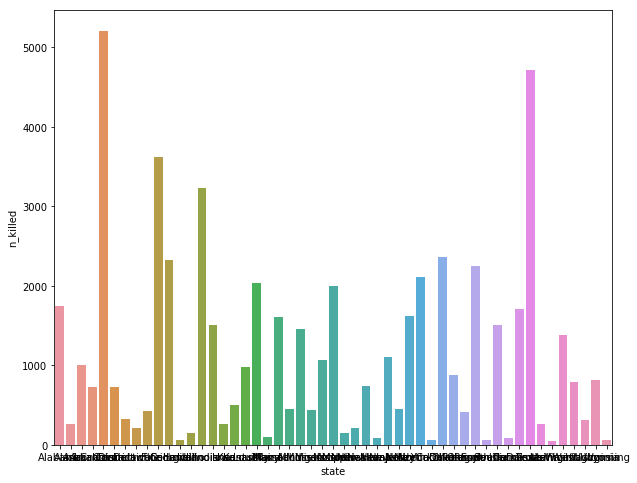

In [21]:
fig, estados = plt.subplots(figsize=(10,8))
estados = sns.barplot(x=left_merge.state, y=left_merge.n_killed, data=left_merge)


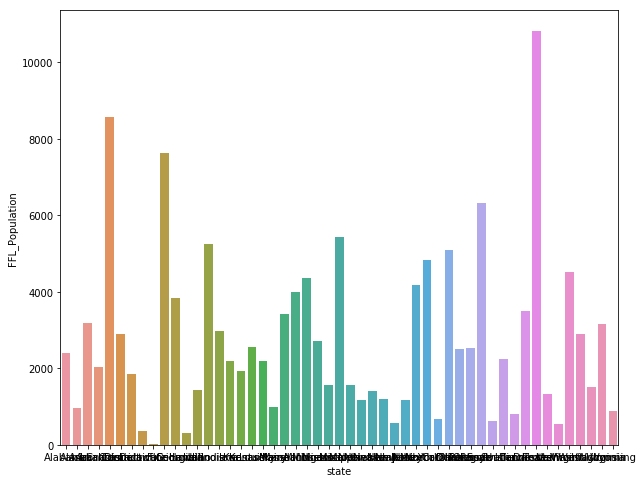

In [22]:
left_merge["FFL_Population"] = pd.to_numeric(left_merge["FFL_Population"])
fig,licencias=plt.subplots(figsize=(10,8))
estados = sns.barplot(x=left_merge.state, y=left_merge.FFL_Population, data=left_merge)

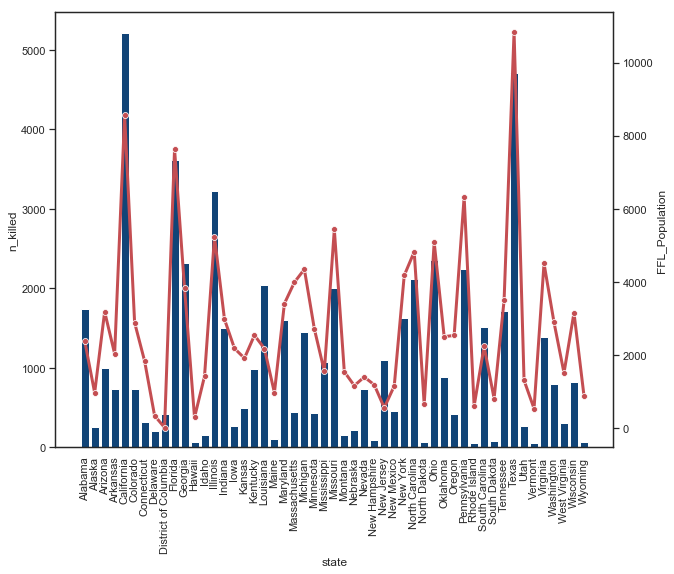

In [29]:
sns.set(style="white", rc={"lines.linewidth": 3})
fig, ax1 = plt.subplots(figsize=(10,8))
ax2 = ax1.twinx()
sns.barplot(x=left_merge.state,
            y=left_merge.n_killed, 
            color='#004488',
            ax=ax1)

sns.lineplot(x=left_merge.state, 
             y=left_merge.FFL_Population,
             color='r',
             marker="o",
             ax=ax2)

ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax2.set_xticklabels(ax1.get_xticklabels(),rotation=90)
sns.set()